# Graduate Admission dataset

In [ ]:
# Context
# This dataset is created for prediction of Graduate Admissions from an Indian perspective.

# Content
# The dataset contains several parameters which are considered important during the application for Masters Programs.
# The parameters included are :

# GRE Scores ( out of 340 )
# TOEFL Scores ( out of 120 )
# University Rating ( out of 5 )
# Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
# Undergraduate GPA ( out of 10 )
# Research Experience ( either 0 or 1 )
# Chance of Admit ( ranging from 0 to 1 )

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# read dataset
df = pd.read_csv("Admission_Predict.csv")


In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
#show first 5 rows
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1
5,6,330,115,5,4.5,3.0,9.34,1,0.90,1
6,7,321,109,3,3.0,4.0,8.20,1,0.75,1
7,8,308,101,2,3.0,4.0,7.90,0,0.68,1
8,9,302,102,1,2.0,1.5,8.00,0,0.50,0
9,10,323,108,3,3.5,3.0,8.60,0,0.45,0


In [ ]:
# Edit the name of the last column to make it easier to work with.
df.rename(columns={"Chance of Admit ": "Chance of Admit"}, inplace=True)


In [ ]:
# Convert the problem to a classification instead of a regression
# Consider the student accepted if the chance of acceptance is greater than 0.5
df['Admitted'] = (df['Chance of Admit'] > 0.5).astype(int)


In [ ]:
print(df.to_string())

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  Chance of Admit  Admitted
0             1        337          118                  4  4.5   4.5  9.65         1             0.92         1
1             2        324          107                  4  4.0   4.5  8.87         1             0.76         1
2             3        316          104                  3  3.0   3.5  8.00         1             0.72         1
3             4        322          110                  3  3.5   2.5  8.67         1             0.80         1
4             5        314          103                  2  2.0   3.0  8.21         0             0.65         1
5             6        330          115                  5  4.5   3.0  9.34         1             0.90         1
6             7        321          109                  3  3.0   4.0  8.20         1             0.75         1
7             8        308          101                  2  3.0   4.0  7.90         0           

In [ ]:
#Select independent and dependent features
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA']]
y = df['Admitted']


In [ ]:
# Data Overview
print("Dataset Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
 9   Admitted           400 non-null    int32  
dtypes: float64(4), int32(1), int64(5)
memory usage: 29.8 KB
Dataset Info:
 None


In [ ]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   Admitted  
count  400.000000  400.000000  400.000000       400.000000  400.00000  
mean     3.452500    8.598925    0.547500         0.724350    0.91250  
std      0.898478    0.596317    0.498362         0.142609    0.2829

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
Admitted             0
dtype: int64


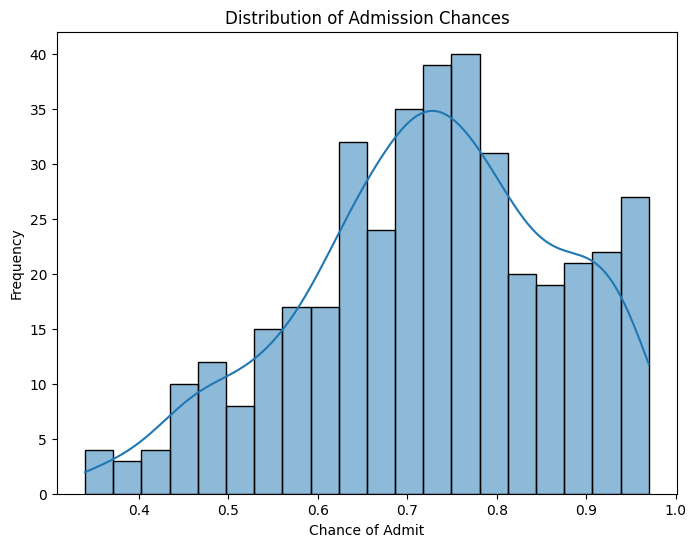

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
sns.histplot(df['Chance of Admit'], bins=20, kde=True)
plt.title("Distribution of Admission Chances")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.show()

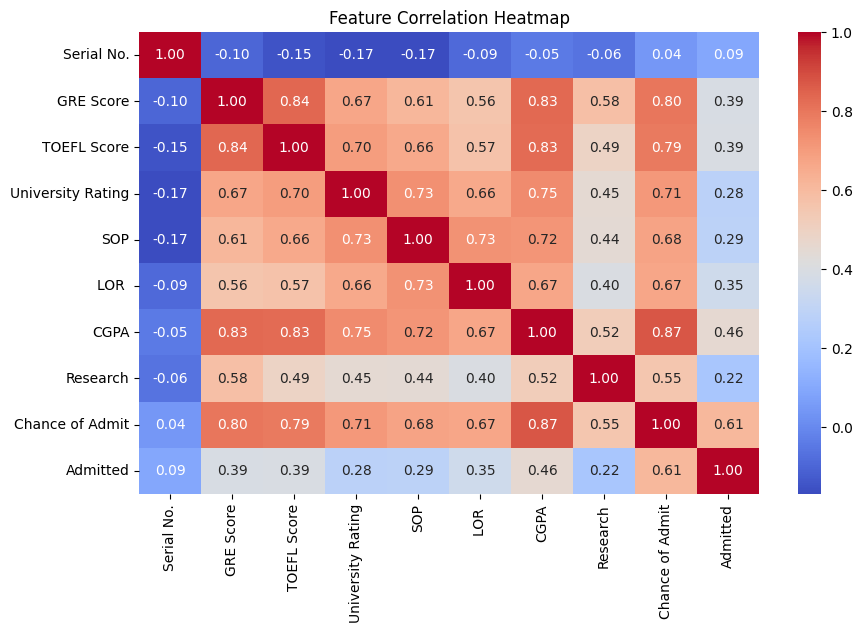

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
## Logistic regression model training
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Predicting results
y_pred = model.predict(X_test)


In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


Accuracy: 0.93
Confusion Matrix:
[[ 4  6]
 [ 0 70]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.92      1.00      0.96        70

    accuracy                           0.93        80
   macro avg       0.96      0.70      0.77        80
weighted avg       0.93      0.93      0.91        80



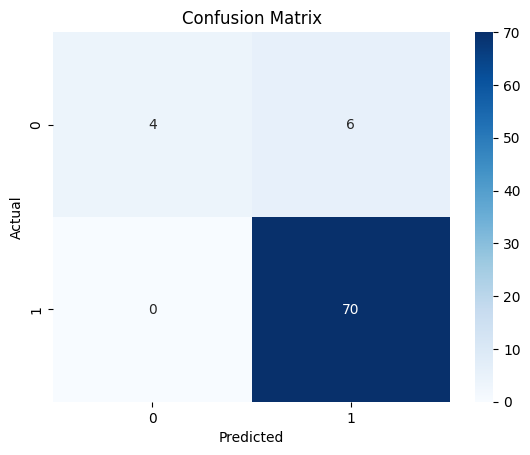

In [ ]:
# Confusion Matrix drawing
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Decision Tree Model Training
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracy_dt:.2f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("Classification Report:")
print(report_dt)


Accuracy: 0.86
Confusion Matrix:
[[ 3  7]
 [ 4 66]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.92      1.00      0.96        70

    accuracy                           0.93        80
   macro avg       0.96      0.70      0.77        80
weighted avg       0.93      0.93      0.91        80



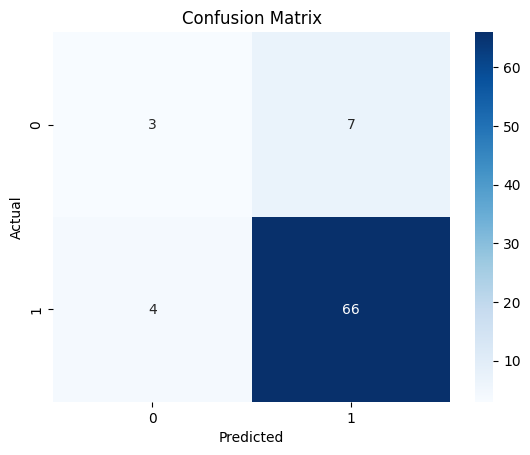

In [ ]:
# Confusion Matrix drawing
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Linear Regression Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr_class = (y_pred_lr > 0.5).astype(int)
accuracy_lr = accuracy_score(y_test, y_pred_lr_class)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr_class)
report_lr = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy_lr:.2f}")
print("Confusion Matrix:")
print(conf_matrix_lr)
print("Classification Report:")
print(report_lr)


Accuracy: 0.88
Confusion Matrix:
[[ 0 10]
 [ 0 70]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.92      1.00      0.96        70

    accuracy                           0.93        80
   macro avg       0.96      0.70      0.77        80
weighted avg       0.93      0.93      0.91        80



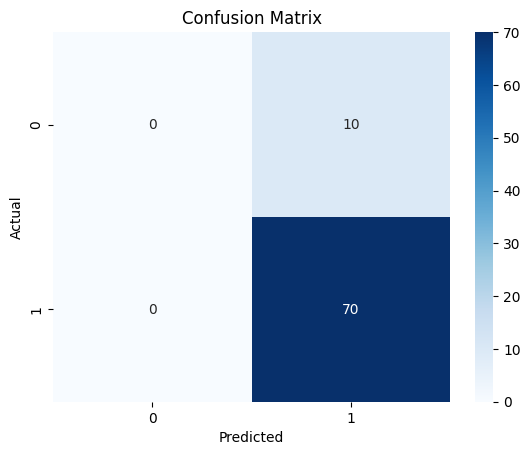

In [ ]:
# Confusion Matrix drawing
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Compare models
models = ['Logistic Regression', 'Decision Tree', 'Linear Regression']
accuracies = [accuracy, accuracy_dt, accuracy_lr]


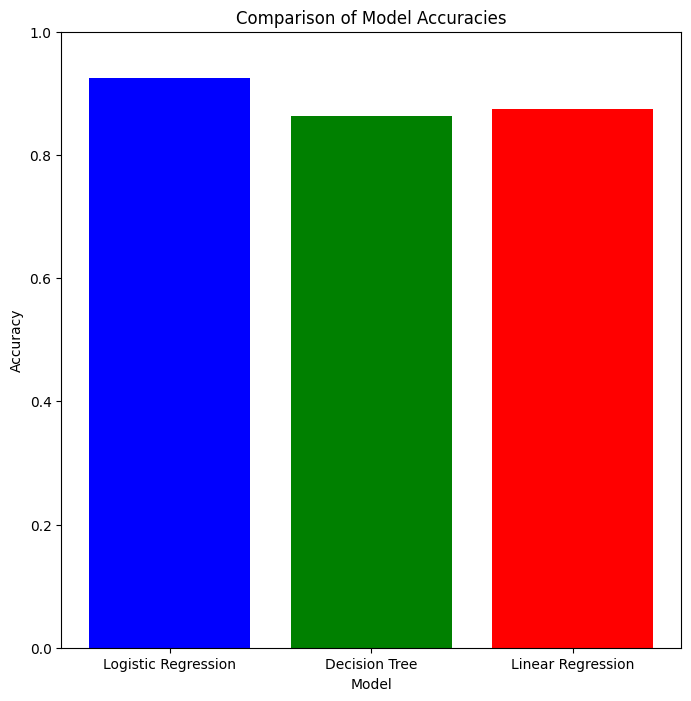

In [ ]:
plt.figure(figsize=(8, 8))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.show()
